In [1]:
# set matplotlib backend to inline
%matplotlib inline 

# import modules
from sklearn import datasets 
import numpy as np 
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
import math

# load data
wine=datasets.load_wine()
print(wine.DESCR)

# this dataset has 13 features, we will only choose a subset of these
df_wine = pd.DataFrame(wine.data, columns = wine.feature_names )
selected_features = ['alcohol','flavanoids','color_intensity','ash']

# extract the data as numpy arrays of features, X, and target, y
X= df_wine[selected_features].values
y= wine.target  

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            10.6  30.0    19.5   3.3
    Ma

## 1.1. Visualising the data
The first part of tackling any ML problem is visualising the data in order to understand some of the properties of the problem at hand. When there are only a small number of classes and features, it is possible to use scatter plots to visualise interactions between different pairings of features.

The following image shows what such a visualisation might look like on the Iris dataset that you worked on during the Topic exercises.

Your first task is to recreate a similar grid for the Wine dataset, with each off-diagonal subplot showing the interaction between two features, and each of the classes represented as a different colour. The on-diagonal subplots (representing a single feature) should show a distribution (or histogram) for that feature.

You should create a function that, given data X and labels y, plots this grid. The function should be invoked something like this:

myplotGrid(X,y,...)

where X is your training data and y are the labels (you may also supply additional optional arguments). You can use an appropriate library to help you create the visualisation. You might want to code it yourself using matplotlib functions scatter and hist - however, this is not strictly necessary here, so try not spend too much time on this.

In [2]:
def myplotGrid(X,y):
    """
    Create a pair plot grid to show the relationships between features in wine dataset

    Parameters:
    - X : Input dataset 
    - y : Labels of the data

    Returns:
    None - displays the diagram
    """
    wine = pd.DataFrame(X, columns=selected_features)
    wine['class'] = y
    sns.pairplot(wine,hue='class', palette='tab10', markers=['o', 's', 'D'], diag_kind='hist')
    plt.show()

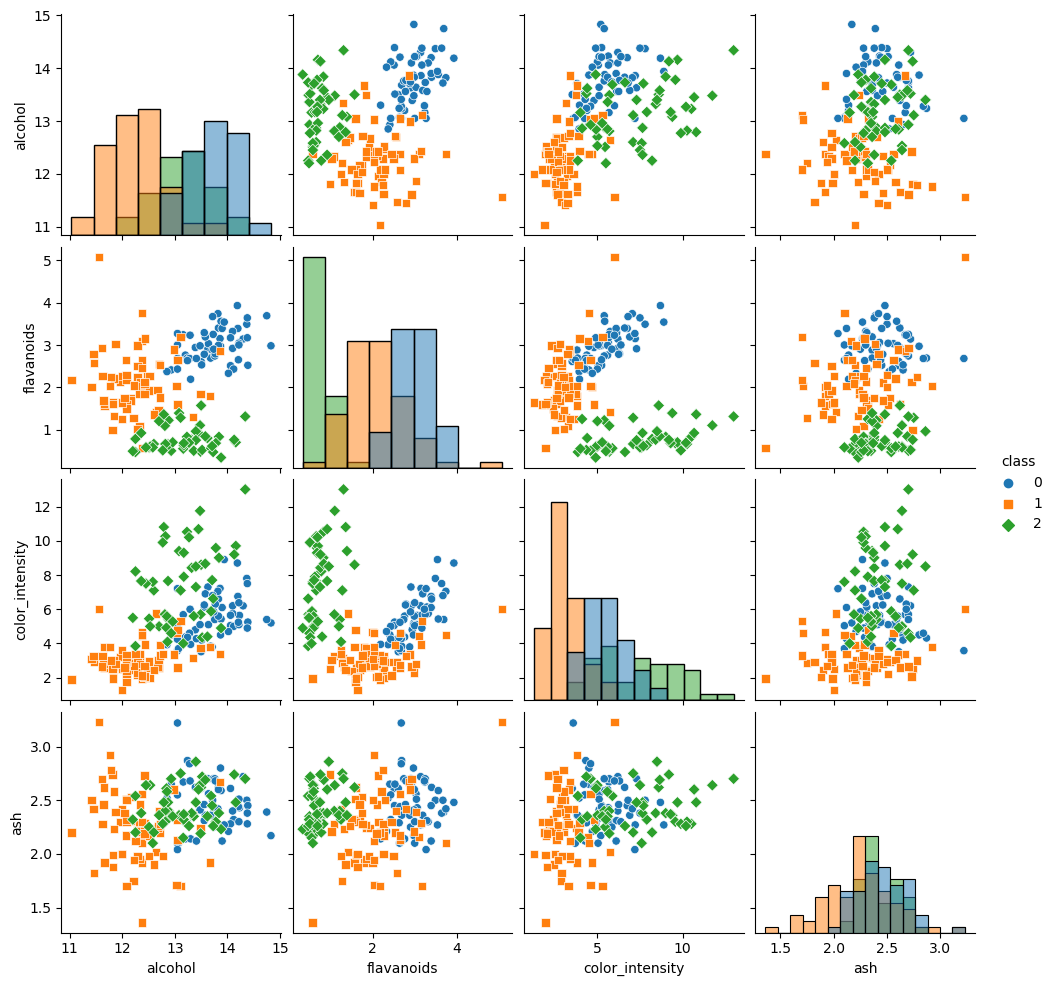

In [3]:
myplotGrid(X,y)

## 1.2. Exploratory Data Analysis under noise
When data are collected under real-world settings they usually contain some amount of noise that makes classification more challenging. In the cell below, invoke your exploratory data analysis function above on a noisy version of your data X.

Try to perturb your data with some Gaussian noise,

initialize random seed to replicate results over different runs 

mySeed = 12345 <br>
np.random.seed(mySeed) <br>
XN=X+np.random.normal(0,0.6,X.shape)<br>

and then invoke

myplotGrid(XN,y)

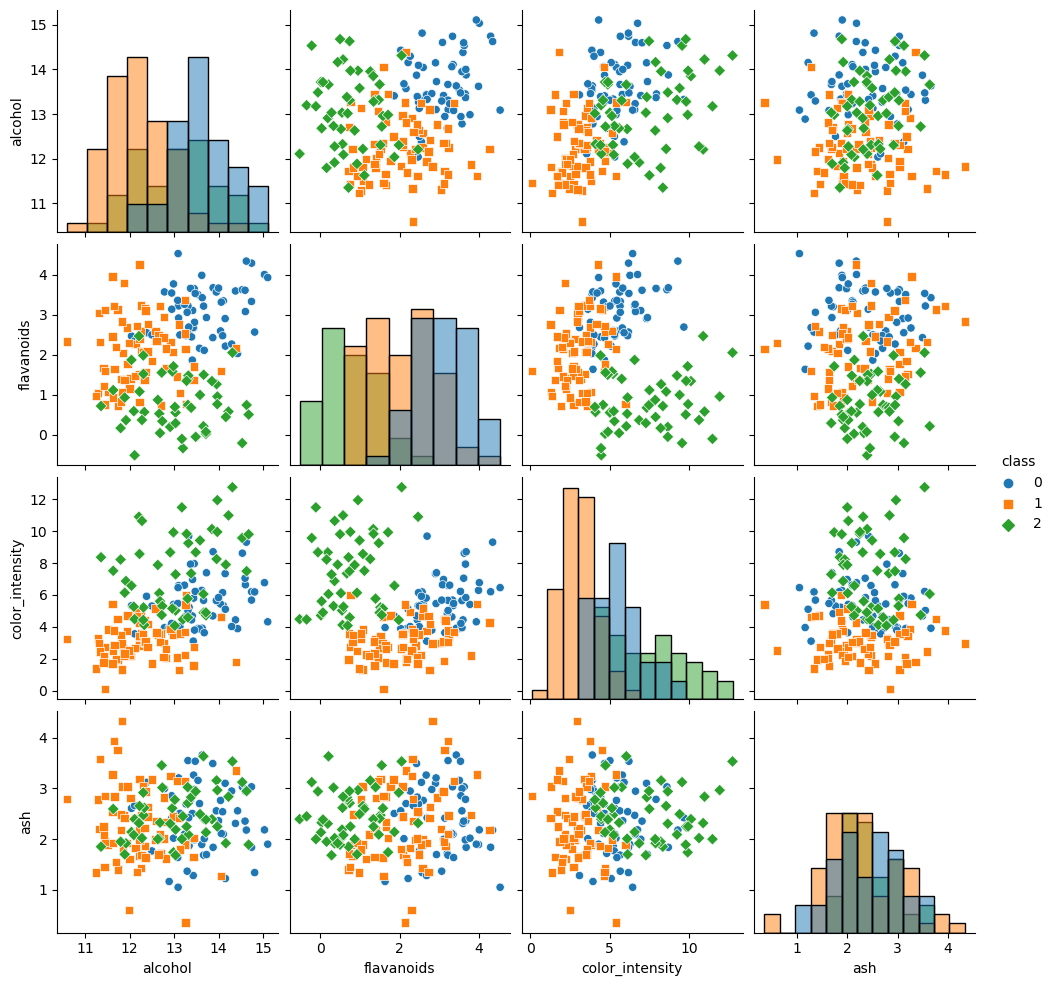

In [4]:
mySeed = 12345 
np.random.seed(mySeed) 
XN=X+np.random.normal(0,0.6,X.shape)

myplotGrid(XN,y)

## Q1. Exploratory data analysis 
##### Based on your exploratory aalysis, if you were to build a classifier suing only two of the available features, which ones would you choose and why? Answer as fully as you can. 

For the classifier I would choose, flavanoids and color_intensity. This is because both of the chosen features have high value in standard deviation of 1.00 and 2.23 . Which means the values are not concentrated but rather spread out to show the difference between the classes making them valuable for classification. Furthermore, when looking at chosen features flavanoids and color_intensity in both diagrams they show the classifying the classes are easier compared to other features as there is less clustering between each classes. 

## Q2. Data with noise
##### What do you observe by plotting the data without noise compared to plotting with added Gaussian noise?


When looking at the diagram with and without Gaussian noise, the following differences were observed. In the scatter plots of the diagram with Gaussian noise were more uneven and more scattered compared to the diagram without noise, as there was less overlap observed between the points. Additionally, with noise there appears to be greater variability, as the height of the histograms generally increased especially in the central area when comparing the graph to without noise graph.

## 2. Implementing kNN
In the cell below, develop your own code for performing k-Nearest Neighbour classification. You may use the scikit-learn k-NN implementation from the labs as a guide - and as a way of verifying your results - but it is important that your implementation does not use any libraries other than the basic numpy and matplotlib functions.

Define a function that performs k-NN given a set of data. Your function should be invoked similary to:

    y_ = mykNN(X,y,X_,options)

where X is your training data, y is your training outputs, X_ are your testing data and y_ are your predicted outputs for X_. The options argument (can be a list or a set of separate arguments depending on how you choose to implement the function) should at least contain the number of neighbours to consider as well as the distance function employed.

Hint: it helps to break the problem into various sub-problems, implemented as helper function. For example, you might want to implement separate function(s) for calculating the distances between two vectors. And another function that uncovers the nearest neighbour(s) to a given vector.

In [5]:
def test_train_split(X,y,test_size):
    """
    Split the dataset into training and testing according to the ratio given
    
    Parameters:
    - X : dataset
    - y : Target classes
    - test_size : ratio to split the dataset between 0 and 1

    Returns:
      - X_train     : Training data
      - y_train     : Training data (classes)
      - X_test      : Testing data
      - y_test  : Testing data (classes)
    """
    np.random.seed(mySeed)
    
    indicesarray = np.arange(X.shape[0]) 
    indicesarray = np.random.permutation(indicesarray)
    
    X = X[indicesarray]
    y = y[indicesarray]
    
    split_point = int(len(X) * (1 - test_size))
    X_train = X[:split_point]
    y_train = y[:split_point]
    X_test = X[split_point:]
    y_test = y[split_point:] 
    return (X_train,y_train,X_test,y_test)
  
def euclidean_distance(a, b):
    """
    Calculate the euclidean distance between two points a and b

    Parameters:
    - a : values of a
    - b : values of b

    Returns:
    euclidean distance between points a and b
    """
    euclidean_distance = np.sqrt(np.sum((a-b)**2))
    return euclidean_distance

def manhattan_distance(a, b):
    """
    Calculate the manhattan distance between two points a and b

    Parameters:
    - a : values of a
    - b : values of b

    Returns:
    manhattan distance between points a and b
    """
    manhattan_distance = 0
    for i in range(0, len(a)):
        manhattan_distance += math.fabs(a[i] - b[i])
    return manhattan_distance

def minkowski_distance(a,b): 
    """
    Calculate the Minkowski distance between two points a and b

    Parameters:
    - a : values of a
    - b : values of b

    Returns:
    Minkowski distance between points a and b
    """
    #power set to 2 as default
    p=2
    minkowski_distance = np.power(np.sum(np.abs(a - b)**p), 1/p)
    return minkowski_distance

def chebyshev_distance(a, b):
    chebyshev_distance = 0
    for i in range(len(a)):
        difference = abs(a[i] - b[i])
        chebyshev_distance = max(chebyshev_distance, difference)

    return chebyshev_distance

In [6]:
def myKNN(X,y,X_,method,k):
    """
    Perform k narest neighbors classification, predicting the class of the data

    Parameters:
    - X : Training data
    - y : Training data (classes)
    - X_: Testing data
    - method: Distance metric 'euclidean' or 'manhattan' or 'minkowski'
    - k : Number of neighbors

    Returns:
    - List of predicted values for test data
    """
    predicted=[]
    calculated_Dis=[]
    for a in X_: 
        if(method =='euclidean'):
            calculated_Dis=[euclidean_distance(a,b)for b in X] 
        elif(method=='manhattan'): 
            calculated_Dis=[manhattan_distance(a,b)for b in X] 
        elif(method=='minkowski'): 
            calculated_Dis=[minkowski_distance(a,b)for b in X]
        elif(method=='chebyshev'): 
            calculated_Dis=[chebyshev_distance(a,b)for b in X]
        else: 
            print('Error: Wrong distance metrics entered')
        nearestK_index=np.argsort(calculated_Dis)[:k]
        nearestK_classes = [y[i] for i in nearestK_index]
        counts= np.bincount(nearestK_classes)
        predicted.append(np.argmax(counts))
    return np.array(predicted)

## 3. Classifier evaluation
In the cell below, implement your own classifier evaluation code. This should include some way of calculating confusion matrices, as well as common metrics like accuracy.

Write some additional code that lets you display the output of your confusion matrices in a useful and easy-to-read manner.

You might want to test your functions on some test data, and compare the results to the sklearn library versions.

In [7]:
def confusion_matrix(true_classes,predicted_classes,fromfunction):
    """
    Calculate the confusion matrix

    Parameters:
    - true_classes: Array of test data labels (classes)
    - predicted_classes: Array of predicted values of test data(classes)

    Returns:
    - Confusion matrix
    """
        
    classes = np.unique(true_classes)
    confusion_mat = np.zeros((len(classes), len(classes)),dtype=int)
    
    for x in range(len(confusion_mat)): 
        for y in range(len(confusion_mat)):
            confusion_mat[x, y] = np.sum((true_classes == classes[x]) & (predicted_classes == classes[y]))
    if(fromfunction=='myKNN'):
        display_table = pd.DataFrame(confusion_mat, index=[f'Actual {c1}' for c1 in classes], columns=[f'Predicted {c2}' for c2 in classes])
        sns.heatmap(display_table, annot=True, cmap='Blues', linewidths=.1)
        plt.show()
    return confusion_mat

def accuracy(confusion_mat):
    """
    Calculate accuracy using the confusion matrix
    accuracy = (TP +TN) /(TP+TN+FP+FN)

    Parameters:
    - confusion_mat: Confusion matrix

    Returns:
    - Accuracy value
    """
    true_sum=0
    total_sum=0
    for i in range(len(confusion_mat)):
        for y in range(len(confusion_mat)): 
            if i==y: 
                true_sum+=confusion_mat[i][y]
    total_sum=np.sum(confusion_mat)

    return round(true_sum / total_sum, 5)

def precision(confusion_mat):
    """
    Calculate precision for each class using the confusion matrix
    precision = TP / (TP +FP) 

    Parameters:
    - confusion_mat: Confusion matrix

    Returns:
    - Precision for each class in a list 
    """
    precision=[]
    for i in range(len(confusion_mat)):
        total_predict=0
        for y in range(len(confusion_mat)):
            total_predict+=confusion_mat[y][i]
        cal_precision=confusion_mat[i][i]/total_predict
        precision.append(round(cal_precision, 2))
    return precision

def recall(confusion_mat): 
    """
    Calculate recall for each class using the confusion matrix
    Recall = TP / (TP+ FN) 

    Parameters:
    - confusion_mat: Confusion matrix.

    Returns:
    - Recall for each class in a list 
    """
    recall=[]
    actual=0
    for i in range(len(confusion_mat)):
        actual=0
        for y in range(len(confusion_mat)):
            actual+=confusion_mat[i][y]
        cal_recall=confusion_mat[i][i]/actual
        recall.append(round(cal_recall, 2))
    return recall

def f1_score(precision, recall):
    """
    Calculate recall for each class using the confusion matrix
    Recall = (2×Precision×Recall)/ Precision+Recall

    Parameters:
    - precision: a list of precision of each class
    - recall: a list of recall of each class

    Returns:
    - f1_score for each class in a list 
    """
    f1_scores=[]
    for val in range(len(precision)): 
        pre=precision[val]
        rec=recall[val]          
        f1=(2*(pre*rec))/(pre+rec)
        f1_scores.append(round(f1,2))
    return f1_scores



KNN with Euclidean distance calculation:


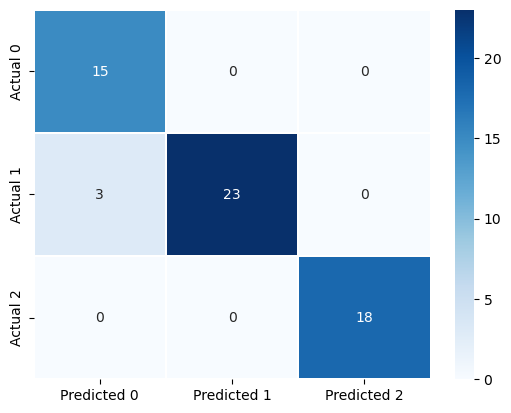

Accuracy:   0.94915
Precision:  [0.83, 1.0, 1.0]
Recall:     [1.0, 0.88, 1.0]
f1_score:   [0.91, 0.94, 1.0]

KNN with Manhattan distance calculation:


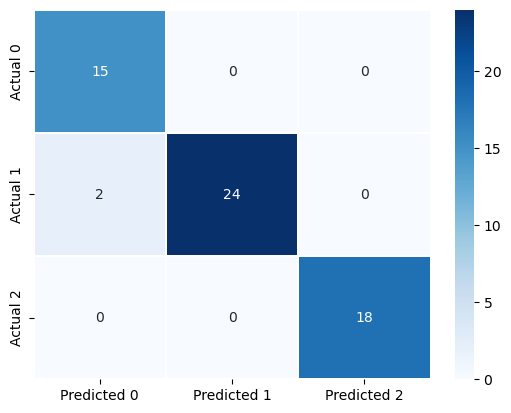

Accuracy:   0.9661
Precision:  [0.88, 1.0, 1.0]
Recall:     [1.0, 0.92, 1.0]
f1_score:   [0.94, 0.96, 1.0]

KNN with Minkowski distance calculation:


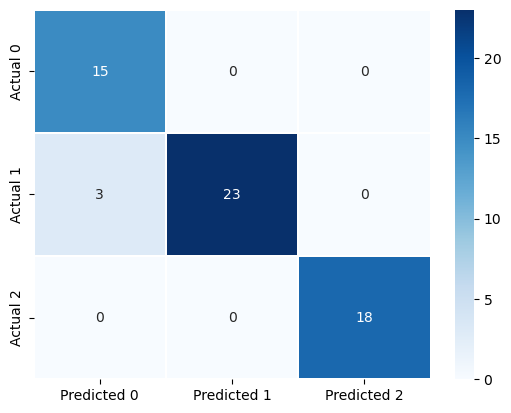

Accuracy:   0.94915
Precision:  [0.83, 1.0, 1.0]
Recall:     [1.0, 0.88, 1.0]
f1_score:   [0.91, 0.94, 1.0]

KNN with Chebyshev distance calculation:


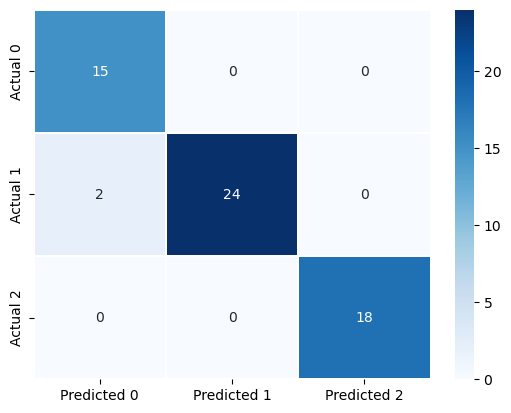

Accuracy:   0.9661
Precision:  [0.88, 1.0, 1.0]
Recall:     [1.0, 0.92, 1.0]
f1_score:   [0.94, 0.96, 1.0]


In [8]:
# Evaluation for KNN with different distance metrics 
X_train,y_train,X_test,y_test=test_train_split(X,y,0.33)

#___________________KNN with Euclidean distance______________________________
y_=myKNN(X_train,y_train,X_test,'euclidean',5)
print("\nKNN with Euclidean distance calculation:")
confusion_mat=confusion_matrix(y_test,y_,'myKNN')
pre=precision(confusion_mat)
rec=recall(confusion_mat)
print("Accuracy:  ",accuracy(confusion_mat))
print("Precision: ",pre)
print("Recall:    ",rec)
print("f1_score:  ",f1_score(pre,rec))


#___________________KNN with Manhattan distance______________________________
y_=myKNN(X_train,y_train,X_test,'manhattan',5)
print("\nKNN with Manhattan distance calculation:")
confusion_mat=confusion_matrix(y_test,y_,'myKNN')
pre=precision(confusion_mat)
rec=recall(confusion_mat)
print("Accuracy:  ",accuracy(confusion_mat))
print("Precision: ",pre)
print("Recall:    ",rec)
print("f1_score:  ",f1_score(pre,rec))

#___________________KNN with Minkowski distance______________________________
y_=myKNN(X_train,y_train,X_test,'minkowski',5)
print("\nKNN with Minkowski distance calculation:")
confusion_mat=confusion_matrix(y_test,y_,'myKNN')
pre=precision(confusion_mat)
rec=recall(confusion_mat)
print("Accuracy:  ",accuracy(confusion_mat))
print("Precision: ",pre)
print("Recall:    ",rec)
print("f1_score:  ",f1_score(pre,rec))

#___________________KNN with Chebyshev distance______________________________
y_=myKNN(X_train,y_train,X_test,'chebyshev',5)
print("\nKNN with Chebyshev distance calculation:")
confusion_mat=confusion_matrix(y_test,y_,'myKNN')
pre=precision(confusion_mat)
rec=recall(confusion_mat)
print("Accuracy:  ",accuracy(confusion_mat))
print("Precision: ",pre)
print("Recall:    ",rec)
print("f1_score:  ",f1_score(pre,rec))

## 4. Nested Cross-validation using your implementation of KNN
In the cell below, develop your own code for performing 5-fold nested cross-validation along with your implemenation of k-NN above. You must write your own code -- the scikit-learn module may only be used for verification purposes.

Your code for nested cross-validation should invoke your kNN function (see above). You cross validation function should be invoked similary to:

#### accuracies_fold = myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan'],mySeed)

where X is your data matrix (containing all samples and features for each sample), 5 is the number of folds, y are your known output labels, list(range(1,11) evaluates the neighbour parameter from 1 to 10, and ['euclidean','manhattan',...] evaluates the distances on the validation sets. mySeed is simply a random seed to enable us to replicate your results.

Notes:

you should perform nested cross-validation on both your original data X, as well as the data pertrubed by noise as shown in the cells above (XN)
you should evaluate at least two distance functions
you should evaluate number of neighbours from 1 to 10
your function should return a list of accuracies per fold
for each fold, your function should print:
the accuracy per distinct set of parameters on the validation set
the best set of parameters for the fold after validation
the confusion matrix per fold (on the testing set)

In [9]:
def accuracy_using_values(true_classes, predicted_classes): 
    """
    Calculate accuracy based on predicted data and true data (classes)
    
    Parameters:
    - true_classes :  true class labels
    - predicted_classes :  predicted class labels

    Returns:
    - Accuracy value
    """
    true_sum = 0
    for true_label, predicted_label in zip(true_classes, predicted_classes): 
        if true_label == predicted_label:
            true_sum += 1

    accuracy = true_sum / len(true_classes)
    return accuracy

def myNestedCrossVal(X, y, k, neighbour_numb, dist_metric, mySeed):
    """
    Perform nested Cross-validation using KNN

    Parameters:
    - X : Input data ()
    - y : Target data
    - k : Number of folds 
    - neighbour_numb - list: List of neighbor numbers to evaluate
    - dist_metric - list: List of distance metrics to evaluate
    - mySeed : Random seed to enable replication of randomization

    Returns:
    - accuracy_fold   : List of accuracy scores calculated per fold.
    - parameters_fold : List of best parameters calculated per fold.
    - conf_matrices   : Array of confusion matrices for calculated per fold.
    """
    accuracy_fold=[]
    parameters_fold=[]
    conf_matrices=[]

    np.random.seed(mySeed)
    indicesarray = np.arange(X.shape[0])
    shuffled_indices=np.random.permutation(indicesarray)
    # split the array into 5 sections
    folds=np.array_split(shuffled_indices,k)
    
    #Outer loop, iterating each fold 
    for i in range(k):
        training_fold = []
        testing_fold = []
        validation_fold = []
        valBin = (i + 1) % k
        # inner loop, separate the fold in to different sets
        for j in range(k):
            if i == j:
                testing_fold = folds[i]
            elif j == valBin:
                validation_fold = folds[valBin]
            else:
                training_fold.extend(folds[j])
                
        bestaccuracy= -10 
        bestdistmet = ''
        bestnn = -1

        # loop to find the best hyperparameters 
        for d in dist_metric:
            for nn in neighbour_numb:
                y_prediction_in = myKNN(X[training_fold], y[training_fold], X[validation_fold], d, nn)
                accuracy = accuracy_using_values(y[validation_fold], y_prediction_in)

                if accuracy > bestaccuracy:
                    bestaccuracy = accuracy
                    bestdistmet = d
                    bestnn = nn

        training_fold.extend(validation_fold)
        y_prediction_out = myKNN(X[training_fold], y[training_fold], X[testing_fold], bestdistmet, bestnn)
        accuracy_test = accuracy_using_values(y[testing_fold], y_prediction_out)
        conf = confusion_matrix(y[testing_fold], y_prediction_out,'myNestedCrossVal')
        
        parameters_fold.append((bestdistmet, bestnn))
        accuracy_fold.append(accuracy_test)
        conf_matrices.append(conf) 

    return accuracy_fold, parameters_fold, np.array(conf_matrices)

Clean data

Fold 1:
Accuracy: 0.9722
Parameters: 
  - Distance Metric: euclidean  
  - Neighbour Number: 3
Confusion Matrix:


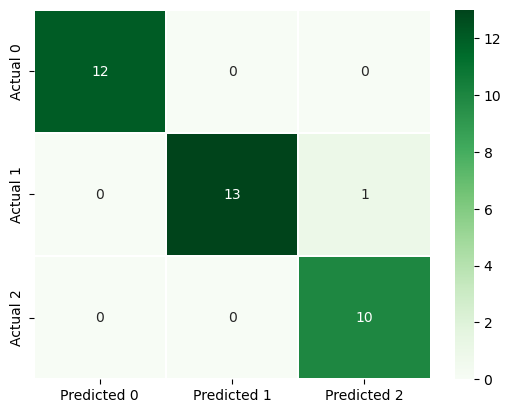


Fold 2:
Accuracy: 0.9167
Parameters: 
  - Distance Metric: euclidean  
  - Neighbour Number: 1
Confusion Matrix:


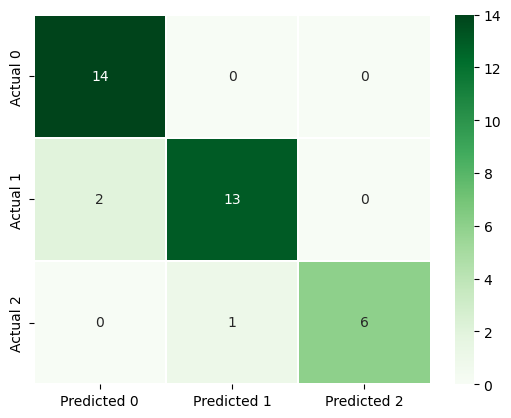


Fold 3:
Accuracy: 0.9444
Parameters: 
  - Distance Metric: euclidean  
  - Neighbour Number: 1
Confusion Matrix:


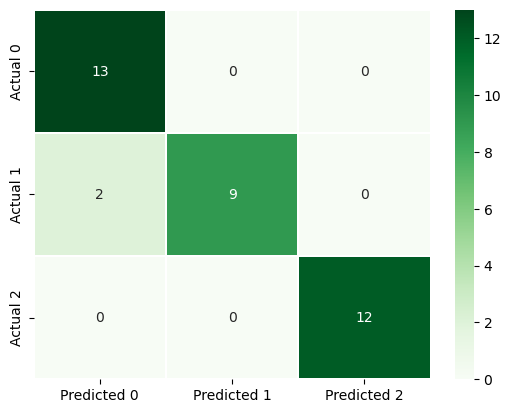


Fold 4:
Accuracy: 0.8857
Parameters: 
  - Distance Metric: euclidean  
  - Neighbour Number: 5
Confusion Matrix:


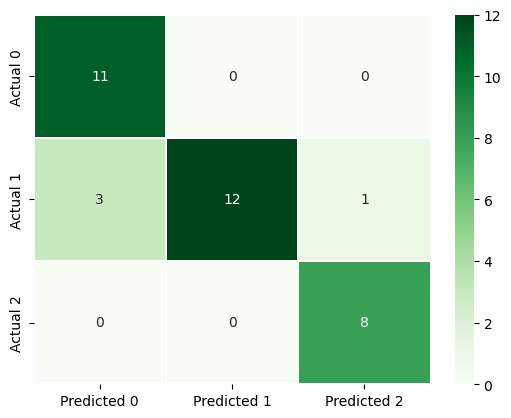


Fold 5:
Accuracy: 0.9429
Parameters: 
  - Distance Metric: euclidean  
  - Neighbour Number: 1
Confusion Matrix:


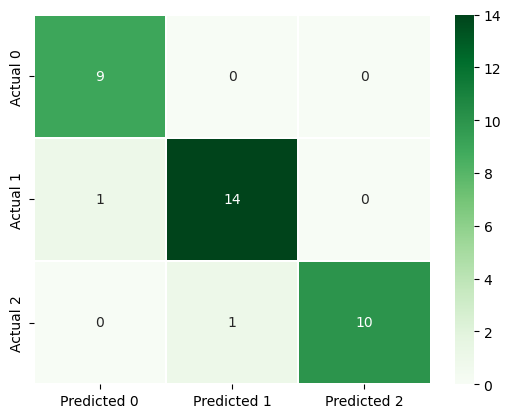

In [15]:
def display_result(accuracy, parameters, conf):
    """
    Display the results of a nested cross-validation including accuracy, parameters, and confusion matrices.

    Parameters:
    - accuracy : List of accuracy scores calculated per fold.
    - parameters: List of best parameters (distance metric and neighbor number) calculated per fold.
    - conf_matrices: Array of confusion matrices calculated per fold.

    Returns:
    None
    """
    for i in range(len(accuracy)):
        print(f"\nFold {i + 1}:")
        print(f"Accuracy: {accuracy[i]:.4f}")
        distance_metric, neighbor_num = parameters[i]
        print(f"Parameters: \n  - Distance Metric: {distance_metric}  \n  - Neighbour Number: {neighbor_num}")
        conf_matrix = pd.DataFrame(conf[i], index=['Actual 0', 'Actual 1', 'Actual 2'], columns=['Predicted 0', 'Predicted 1', 'Predicted 2'])
        sns.heatmap(conf_matrix,annot=True, cmap='Greens', linewidths=.1)
        print('Confusion Matrix:')
        plt.show()

# evaluate clean data code
clean_accuracy, clean_parameters,clean_conf_mat= myNestedCrossVal(X,y,5,list(range(1,11)),['euclidean','manhattan','minkowski','chebyshev'],mySeed)
print('Clean data')
display_result(clean_accuracy,clean_parameters,clean_conf_mat)    


Noisy data

Fold 1:
Accuracy: 0.9167
Parameters: 
  Distance Metric: euclidean  
  Neighbour Number: 1
Confusion Matrix:


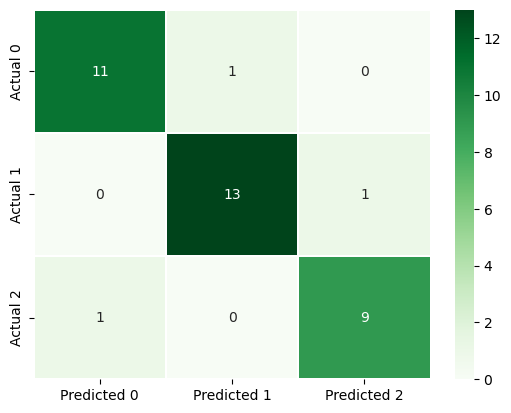


Fold 2:
Accuracy: 0.8611
Parameters: 
  Distance Metric: euclidean  
  Neighbour Number: 5
Confusion Matrix:


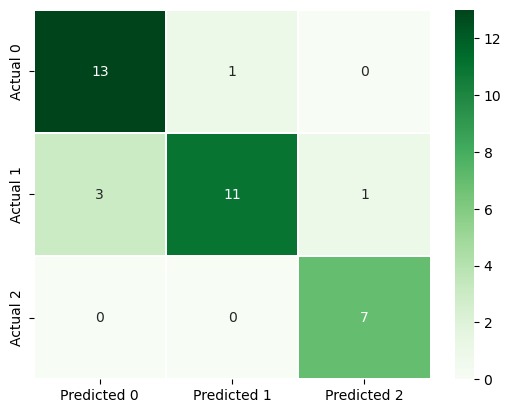


Fold 3:
Accuracy: 0.8611
Parameters: 
  Distance Metric: euclidean  
  Neighbour Number: 4
Confusion Matrix:


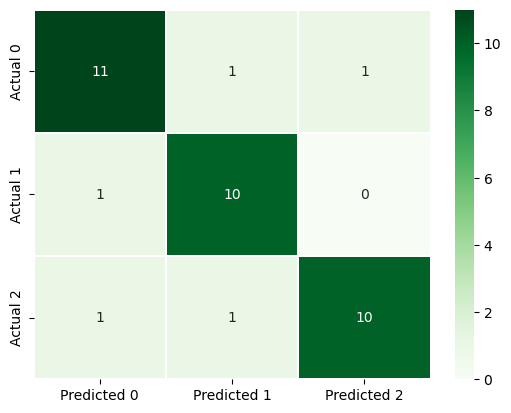


Fold 4:
Accuracy: 0.8571
Parameters: 
  Distance Metric: manhattan  
  Neighbour Number: 10
Confusion Matrix:


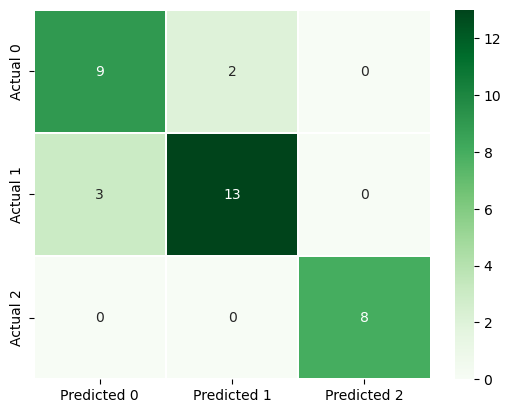


Fold 5:
Accuracy: 0.9429
Parameters: 
  Distance Metric: euclidean  
  Neighbour Number: 8
Confusion Matrix:


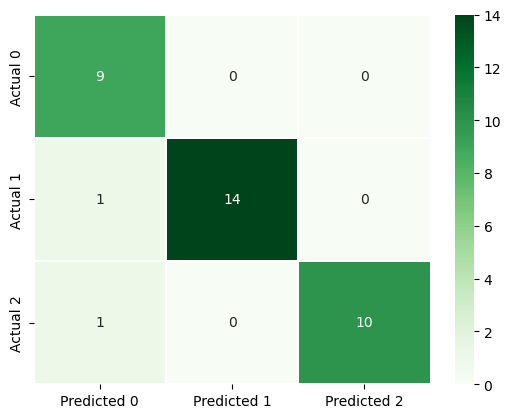

In [11]:
# evaluate noisy data code
noisy_accuracy, noisy_parameters,noisy_conf_mat= myNestedCrossVal(XN,y,5,list(range(1,11)),['euclidean','manhattan','minkowski'],mySeed)
print('Noisy data')
display_result(noisy_accuracy,noisy_parameters,noisy_conf_mat)

## 5. Summary of results

In [12]:
def result_table(accuracy, parameter):
    """
    Create a DataFrame to show the results of nested cross-validation 
    
    Parameters:
    - accuracy : List of accuracy scores calculated per fold.
    - parameters: List of best parameters (distance metric and neighbor number) calculated per fold.

    Returns:
    - results_df: DataFrame that summarizes the results of nested cross-validation including 'Fold', 'Accuracy', 'K', 'Distance'.
    """
    results=[]
    columns = ['Fold', 'Accuracy', 'K', 'Distance']
    for i in range(len(accuracy)):
        fold_accuracy = accuracy[i]
        distance, k = parameter[i]

        result = [i + 1, f'{fold_accuracy:.4f}', k, distance]
        results.append(result)

    results_df = pd.DataFrame(results, columns=columns)
    return results_df

clean_total_average=np.average(clean_accuracy)
clean_standard_dev=np.std(clean_accuracy)

print('Clean')
clean_results_df=result_table(clean_accuracy, clean_parameters)
display(clean_results_df.style.hide(axis="index"))
print(f"Total: {clean_total_average:.4f} ± {clean_standard_dev:.4f}")


Clean


Fold,Accuracy,K,Distance
1,0.9722,3,euclidean
2,0.9167,1,euclidean
3,0.9444,1,euclidean
4,0.8857,5,euclidean
5,0.9429,1,euclidean


Total: 0.9324 ± 0.0292


In [13]:
noisy_total_average=np.average(noisy_accuracy)
noisy_standard_dev=np.std(noisy_accuracy)

print('Noisy')
noisy_results_df=result_table(noisy_accuracy, noisy_parameters)
display(noisy_results_df.style.hide(axis="index"))
print(f"Total: {noisy_total_average:.4f} ± {noisy_standard_dev:.4f}")

Noisy


Fold,Accuracy,K,Distance
1,0.9167,1,euclidean
2,0.8611,5,euclidean
3,0.8611,4,euclidean
4,0.8571,10,manhattan
5,0.9429,8,euclidean


Total: 0.8878 ± 0.0353


## 5.2. Confusion matrix summary
Summarise the overall results of your nested cross validation evaluation of your K-NN algorithm using two summary confusion matrices (one for the noisy data, one for the clean data). You might want to adapt your myNestedCrossVal code above to also return a list of confusion matrices.

Use or adapt your evaluation code above to print the two confusion matrices below. Make sure you label the matrix rows and columns. You might also want ot show class-relative precision and recall.



CLEAN
Summary confusion matrix:


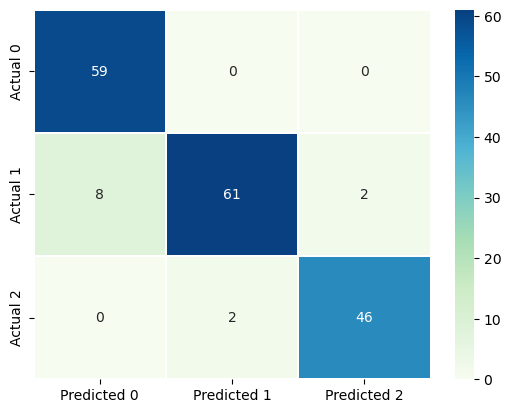

Accuracy              :0.9326 
Precision for classes :  [0.88, 0.97, 0.96]
Recall for classes    :  [1.0, 0.86, 0.96]

NOISY
Summary confusion matrix:


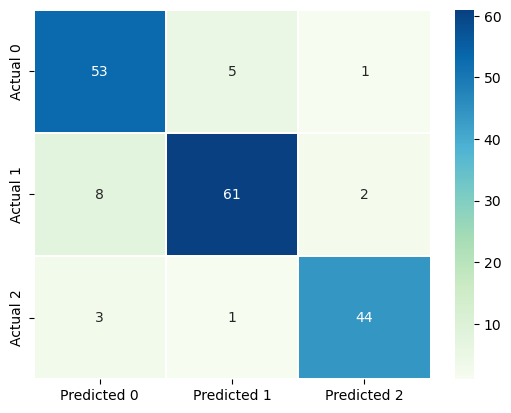

Accuracy              :0.8876 
Precision for classes :  [0.83, 0.91, 0.94]
Recall for classes    :  [0.9, 0.86, 0.92]


In [14]:
# function to crate confusion matrix using values
def summary_mat(input_matrix): 
    """
    Creating summary confusion matrix by adding all the confusion matrices

    Parameters:
    - input_matrix: List of confusion matrices to be summarized.

    Returns:
    - summary confusion matrix 
    """
    matrix = np.zeros(input_matrix[0].shape)
    for mat in input_matrix: 
        matrix=np.add(matrix,mat)
        matrix = matrix.astype(int)
        matrix_table = pd.DataFrame(matrix,index=['Actual 0', 'Actual 1', 'Actual 2'], columns=['Predicted 0', 'Predicted 1', 'Predicted 2'])
    sns.heatmap(matrix_table, annot=True, cmap='GnBu', linewidths=.1)
    plt.show() 
    return matrix

#___________________CLEAN______________________________
print('\nCLEAN')
print('Summary confusion matrix:')
clean_summary_mat=summary_mat(clean_conf_mat)
print(f"Accuracy              :{accuracy(clean_summary_mat):.4f} ")
print("Precision for classes : ",precision(clean_summary_mat))
print("Recall for classes    : ",recall(clean_summary_mat))

#___________________NOISY______________________________
print('\nNOISY')
print('Summary confusion matrix:')
noisy_summary_mat=summary_mat(noisy_conf_mat)
print(f"Accuracy              :{accuracy(noisy_summary_mat):.4f} ")
print("Precision for classes : ",precision(noisy_summary_mat))
print("Recall for classes    : ",recall(noisy_summary_mat))

    

## 6. More questions
Now answer the following questions as fully as you can. The answers should be based on your implementation above. Write your answers in the Markdown cells below each question.

#### Q3. Influence of noise
Do the best parameters change when noise is added to the data? Can you say that one parameter choice is better regardless of the data used?

##### Answer:
Yes, the best parameters changed when noise was added to the data. With clean data, only the Euclidean metrics were selected. However, for data with noise, the Mahattan metrics were selected once. In addition, the k-value varied significantly between clean and noisy data. For clean data, the k-value was between 1 and 5, while for noisy data it was between 1 and 10, indicating that the parameters changed when noise was added to the data.

#### Q4. Tie break
Assume that you have selected the number of neighbours to be an even number, e.g., 2. For one of the neighbours, the suggested class is 1, and for the other neighbour the suggested class is 2. How would you break the tie? Write example pseudocode that does this.

##### Answer:
In this situaction I would choose the class from the value that has the clossest distance <br>
#In my real code of KNN, nearestK_classes list stores the labels of values in ascending order so neighbours_classes = nearestK_classes<br>
<br>
neighbours_classes=[( )]<br>
if len(neighbours_classes)==2: <br>
>if neighbours_classes.unique() ==2:  <br>
>>chosenclass=neighbours_classes[0]<br>

#### Q5. Beyond Wine
If you were to run your k-nn algorithm on a new dataset (e.g., the breast cancer dataset, or Iris), what considerations would you need to take into consideration? Outline any changes that might be needed to your code.


##### Answer:
I would pay attention to whether the data set was split into a training set and a train set. This is because for my kNN function, the data needs to be split into training data and test data so that the labels for the test data can be predicted using the training data. The second consideration is whether the distance metric is suitable for this data set. Currently the distance metrics 'Euclidean', 'Manhattan' and 'Minkowski' are available, but there may be a better metric for these new dataset. Finally, consider the appropriate value for k. For this wine dataset, the k value was currently 5, but for new dataset case, if lots of noise has been added to the datasets then to reduce sensitivity, the k value should be increased.